<span>
<b>Methods Workshop in Quantitative Text Analysis </b><br/>     
<b>Author:</b> <a href="https://github.com/jisukimmmm">Jisu Kim</a><br/>
<b>Python version:</b>  >=3.6<br/>
<b>Last update:</b> 21/05/2024
</span>

<a id='top'></a>
# *Advanced Text analysis in Python - Unsupervised ML - Exercises*

In this exercise, we will explore various unsupervised learning techniques 
We use 20 Newsgroups dataset, focusing on three specific ategories: 'talk.politics.guns', 'comp.graphics', and 'sci.space'. These texts provide rich and varied content that is ideal for practicing unsupervised learning methods on text data. It may take some time to run them all. Feel free to use part of the data to carry out the exercises.

## PCA Exercise

- Perform Principal Component Analysis (PCA) on the TF-IDF vectors of sentences on 'talk.politics.guns' and "comp.graphics". 
- Visualize the first two principal components and color-code the sentences.
  
## 2. Clusters
### 2.1 K-means Exercise
- Apply K-means clustering to the sentence embeddings on 'comp.graphics', and 'sci.space' categories.
- Determine the optimal number of clusters using the elbow method and silhouette score.
- Visualize the clusters and interpret the results.

### 2.2 MClust
- Implement Model-based clustering on the data using TF-IDF vectors. Use the 'talk.politics.guns' and 'sci.space' categories.
- Identify the clusters and compare them with different categories to see how they group together.
- Discuss if the clustering makes sense contextually.

### 2.3 Hierarchical Clustering
- Use hierarchical clustering on the sentence embeddings using the "politics" category.
- Create a dendrogram and identify major clusters.

## 3. Co-occurrence Matrix

- Tokenize the text and build the co-occurrence matrix for "politics" and "sci.space" data.
- Visualize the matrix as a heatmap.
- Compare the co-occurrence patterns between the "politics" and "sci.space".
- Discuss any interesting word relationships or differences.

## 4. Word Embeddings

### 4.1 Word2Vec Exercise
- Train a Word2Vec model on the whole data.
- Find and visualize the embeddings for the top 10 most frequent words from each category.
- Explore word analogies and nearest neighbors for selected words.

## 5. Similarity

- Calculate the cosine similarity between the "sci.space" and "comp.graphics" using TF-IDF vectors.
- Identify and discuss which articles are most similar between the two data.

## 6. Pointwise Mutual Information (PMI)

- Calculate the PMI for word pairs in 'comp.graphics'. Focus on the first 30 texts.
- Identify the top 10 word pairs with the highest PMI in each category and analyze their significance in the context of the story.

## 7. Topic Modelling

### 7.1 Latent Semantic Analysis (LSA) Exercise
- Apply LSA on the topic of "politics".
- Identify and interpret the top 5 topics.

### 7.2 Latent Dirichlet Allocation (LDA) Exercise
- Perform LDA on the data, treating each category as a document.
- Determine the optimal number of topics using coherence scores.
- Display the top words for each topic.
- Discuss how well the topics represent the content of the data.



## Answers

## Load libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

### 1. PCA Exercise
- Perform Principal Component Analysis (PCA) on the TF-IDF vectors of sentences. Use ['talk.politics.guns', 'comp.graphics'] categories
- Visualize the first two principal components and color-code the sentences.

In [49]:
from sklearn.decomposition import PCA

# Load 20 newsgroups data
categories = ['talk.politics.guns', 'comp.graphics']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Preprocess data (you may need to define the preprocess_text function)
# Preprocess data
def preprocess_text(text):
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Tokenize and remove stopwords
    return ' '.join([word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stopwords.words('english')])

processed_texts = [preprocess_text(text) for text in newsgroups.data]

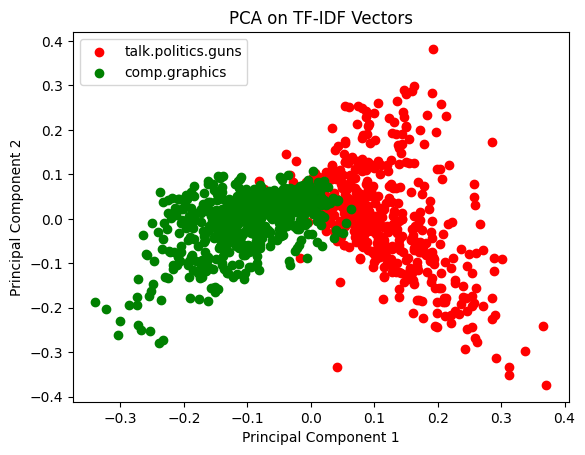

In [51]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', max_features=1000)
X = vectorizer.fit_transform(processed_texts)

# PCA Exercise
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X.toarray())

# Visualization
colors = ['r', 'g', 'b']
for category, color in zip(categories, colors):
    indices = [i for i, target in enumerate(newsgroups.target) if newsgroups.target_names[target] == category]
    plt.scatter(X_reduced[indices, 0], X_reduced[indices, 1], color=color, label=category)
plt.legend()
plt.title('PCA on TF-IDF Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

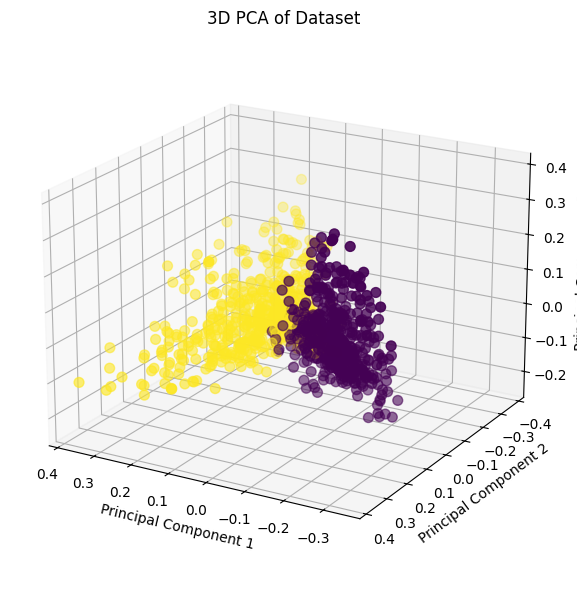

In [52]:
# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X.toarray())

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract the three principal components
x = pca_result[:, 0]
y = pca_result[:, 1]
z = pca_result[:, 2]

# Create a scatter plot
ax.scatter(x, y, z, c=newsgroups.target, cmap='viridis', s=50)  # 'c' is for coloring by target classes

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Title
ax.set_title('3D PCA of Dataset')

# Set viewing angle
ax.view_init(elev=20, azim=120)

# Adjust layout
plt.tight_layout()


# Show plot
plt.show()


### 1.1 K-means Exercise
- Apply K-means clustering to the sentence embeddings on 'comp.graphics', and 'sci.space' categories.
- Determine the optimal number of clusters using the elbow method and silhouette score.
- Visualize the clusters and interpret the results.


In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Load 20 newsgroups data
sci = fetch_20newsgroups(subset='train', categories=['sci.space'], remove=('headers', 'footers', 'quotes'))
comp = fetch_20newsgroups(subset='train', categories=['comp.graphics'], remove=('headers', 'footers', 'quotes'))

# Take first 30 rows of data for each category
data_sci_space = sci.data#[:30]
data_comp = comp.data#[:30]

# Concatenate the data
data= data_sci_space + data_comp

# Preprocess data
def preprocess_text(text):
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    return ' '.join(filtered_tokens)

# Preprocess the data
processed_texts = [preprocess_text(text) for text in data]

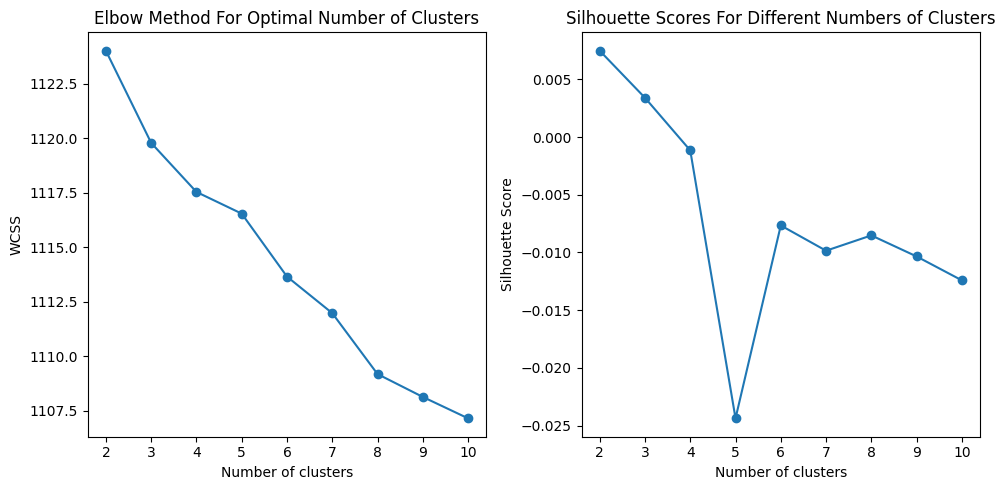

In [55]:
# Convert text data to TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_texts).toarray()

# Apply K-means clustering
def apply_kmeans(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans

def determine_optimal_clusters(X):
    wcss = []
    silhouette_scores = []
    for i in range(2, 11):  # Silhouette score is not defined for 1 cluster
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, 11), wcss, marker='o')
    plt.title('Elbow Method For Optimal Number of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Scores For Different Numbers of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    
    plt.tight_layout()
    plt.show()

determine_optimal_clusters(X)

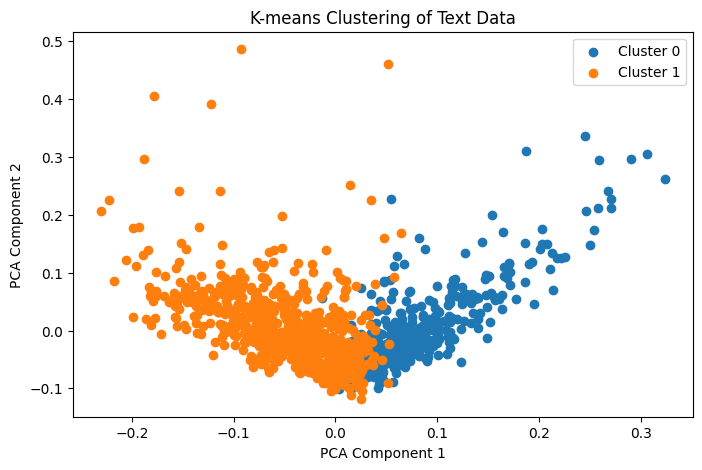

Cluster 0:
orbit
dont
one
get
launch
nasa
think
like
would
space
--------------------------------------------------
Cluster 1:
one
im
image
please
files
know
would
graphics
anyone
thanks
--------------------------------------------------


In [56]:
# Apply K-means with the chosen number of clusters
num_clusters = 2  # Choose the number based on the elbow method plot
kmeans = apply_kmeans(X, num_clusters)

# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
for i in range(num_clusters):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.title('K-means Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Interpret the results
cluster_centers = kmeans.cluster_centers_
terms = vectorizer.get_feature_names_out()

for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in cluster_centers[i].argsort()[-10:]:  # Print top 10 terms per cluster
        print(terms[ind])
    print('-' * 50)


### 2.1 MCluster
- Implement Model-based clustering on the data using TF-IDF vectors. Use the 'talk.politics.guns' and 'sci.space' categories.
- Identify the clusters and compare them with different categories to see how they group together.
- Discuss if the clustering makes sense contextually.

In [57]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['talk.politics.guns', 'sci.space'], remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data[:1000]
true_labels = newsgroups.target[:1000]


# Preprocess the text data and convert to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(texts).toarray()

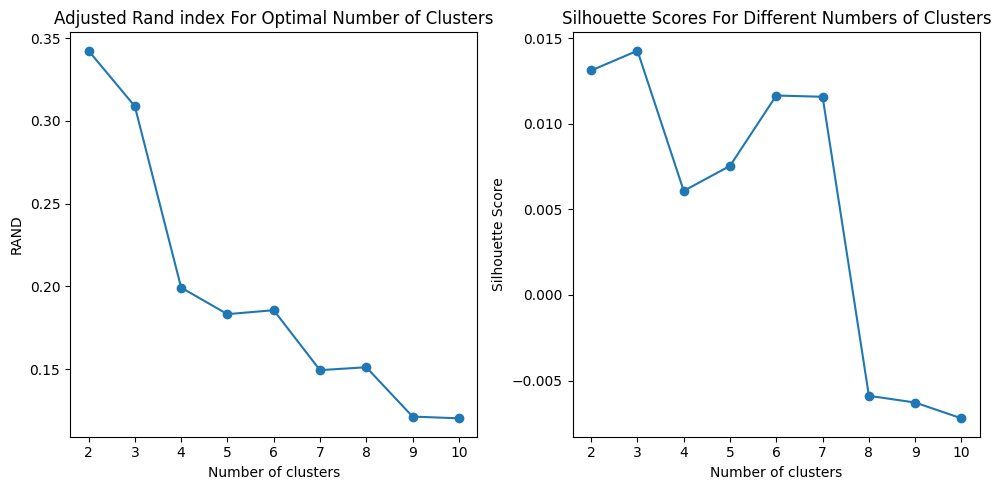

In [58]:
def determine_optimal_clusters(X):
    rand = []
    silhouette_scores = []
    for n_clusters in range(2, 11):  # Silhouette score is not defined for 1 cluster
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        gmm_labels = gmm.fit_predict(X)
        rand.append(adjusted_rand_score(true_labels, gmm_labels))
        silhouette_scores.append(silhouette_score(X, gmm_labels))
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, 11), rand, marker='o')
    plt.title('Adjusted Rand index For Optimal Number of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('RAND')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Scores For Different Numbers of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    
    plt.tight_layout()
    plt.show()

determine_optimal_clusters(X)


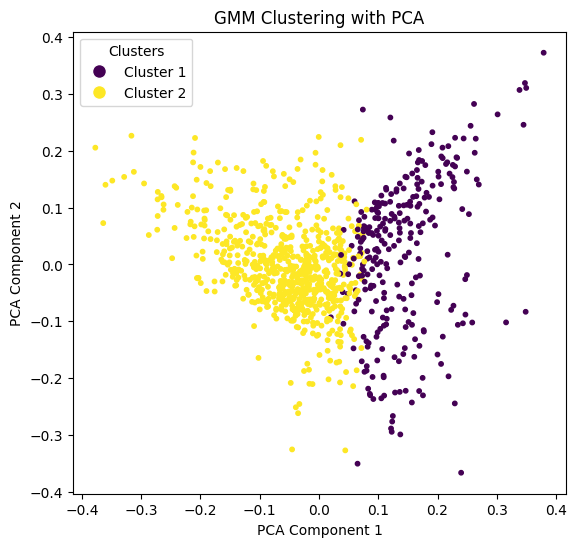

In [59]:
# Apply the Gaussian Mixture Model for clustering
n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X)


# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=10)
plt.title('GMM Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Create legend
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8']
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(n_clusters)]
plt.legend(handles, legend_labels, title="Clusters", loc='upper left')

plt.show()

### 2.3 Hierarchical Clustering
- Use hierarchical clustering on the sentence embeddings using the "politics" category.
- Create a dendrogram and identify major clusters.

In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import inconsistent

# Load 20 newsgroups data
categories = ['talk.politics.guns']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Preprocess data (you may need to define the preprocess_text function)

# Take the data
data_politics = newsgroups.data[:50]  

# Preprocess data
def preprocess_text(text):
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    return ' '.join(filtered_tokens)

# Preprocess and tokenize the data
processed_texts = [preprocess_text(text) for text in data_politics]

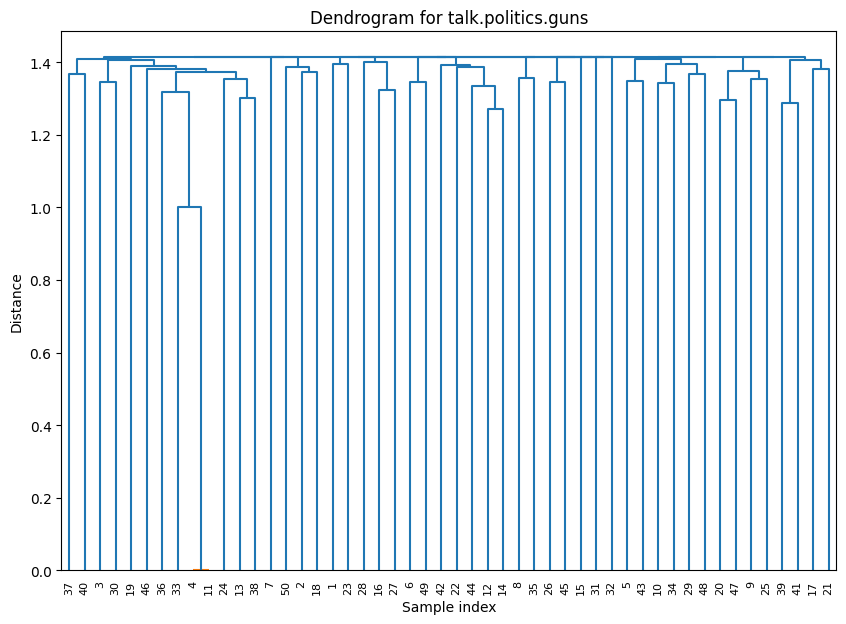

Cluster 1:
- 

On Ted Koppel last night, the ubiquitous Australian woman claimed that
Koresh trained the women (y...
--------------------------------------------------
Cluster 2:
-  
[...]
 
      Well, chalk one up for driving away sympathies by looking like
a paranoid lunatic.
 ...
--------------------------------------------------
Cluster 3:
- 
Of course, if you're a criminal, or hang around with criminals, or
flash large wads of cash in the ...
--------------------------------------------------
Cluster 4:
- 
There are roughly 1200 fatal, firearms-related accidents each year.
The large majority involve rifl...
--------------------------------------------------
Cluster 5:
- ...
- ...
--------------------------------------------------
Cluster 6:
- ----------------------------------------------------------------------
Open letter by Dr. Paul H. Bl...
--------------------------------------------------
Cluster 7:
-          ^^^^^^^
 
You can't spell. There is no question about it.

 
We 

In [121]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_texts).toarray()

# Perform hierarchical clustering using 'complete' linkage method
Z = linkage(X, 'complete')

# Create a dendrogram
plt.figure(figsize=(10, 7))
plt.title('Dendrogram for talk.politics.guns')
dendrogram(Z, labels=np.arange(1, len(processed_texts) + 1))
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Identify clusters
from scipy.cluster.hierarchy import fcluster

# # Compute inconsistency statistics
# incons = inconsistent(Z)

# Choose a threshold based on the inconsistency
# threshold = 0.5 * np.mean(incons[:, 3])  # Adjust this threshold as needed
threshold = 0.1
clusters = fcluster(Z, threshold, criterion='distance')

# Print the clusters and some example sentences from each cluster
for cluster in np.unique(clusters):
    print(f"Cluster {cluster}:")
    cluster_indices = np.where(clusters == cluster)[0]
    for idx in cluster_indices[:3]:  # Print first 3 sentences from each cluster as an example
        print(f"- {data_politics[idx][:100]}...")  # Print the first 100 characters
    print("-" * 50)

In [118]:
from sklearn.metrics import silhouette_score

best_threshold = None
best_score = -1

# Try different thresholds and compute silhouette scores
for threshold in np.linspace(0.1, 2.0, 20):
    clusters = fcluster(Z, threshold, criterion='distance')
    if len(set(clusters)) > 1:
        score = silhouette_score(X, clusters)
        if score > best_score:
            best_score = score
            best_threshold = threshold

print(f"Best threshold: {best_threshold}, Silhouette Score: {best_score}")


Best threshold: 0.1, Silhouette Score: 0.04


## 3. Co-occurrence Matrix

- Tokenize the text and build the co-occurrence matrix for "politics" and "sci.space" data.
- Visualize the matrix as a heatmap.
- Compare the co-occurrence patterns between the "politics" and "sci.space".
- Discuss any interesting word relationships or differences.


In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from itertools import combinations

# Load 20 newsgroups data
sci = fetch_20newsgroups(subset='train', categories=['sci.space'], remove=('headers', 'footers', 'quotes'))
poli = fetch_20newsgroups(subset='train', categories=['talk.politics.guns'], remove=('headers', 'footers', 'quotes'))

# Take first 30 rows of data for each category
data_sci_space = sci.data[:30]
data_politics = poli.data[:30]

# Preprocess data
def preprocess_text(text):
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    return filtered_tokens

# Tokenize the data
tokenized_sci_space = [preprocess_text(text) for text in data_sci_space]
tokenized_politics = [preprocess_text(text) for text in data_politics]

In [65]:
# Function to build co-occurrence matrix
def build_cooccurrence_matrix(tokenized_texts, window_size=5):
    vocab = Counter()
    for text in tokenized_texts:
        vocab.update(text)
    
    vocab = {word: i for i, (word, _) in enumerate(vocab.items())}
    cooccurrence_matrix = np.zeros((len(vocab), len(vocab)))
    
    for text in tokenized_texts:
        for i, word in enumerate(text):
            if word in vocab:
                context = text[max(i - window_size, 0): i] + text[i + 1: i + window_size + 1]
                for context_word in context:
                    if context_word in vocab:
                        cooccurrence_matrix[vocab[word], vocab[context_word]] += 1
                        cooccurrence_matrix[vocab[context_word], vocab[word]] += 1
    
    return cooccurrence_matrix, vocab

# Build co-occurrence matrices for both categories
cooccurrence_matrix_sci_space, vocab_sci_space = build_cooccurrence_matrix(tokenized_sci_space)
cooccurrence_matrix_politics, vocab_politics = build_cooccurrence_matrix(tokenized_politics)

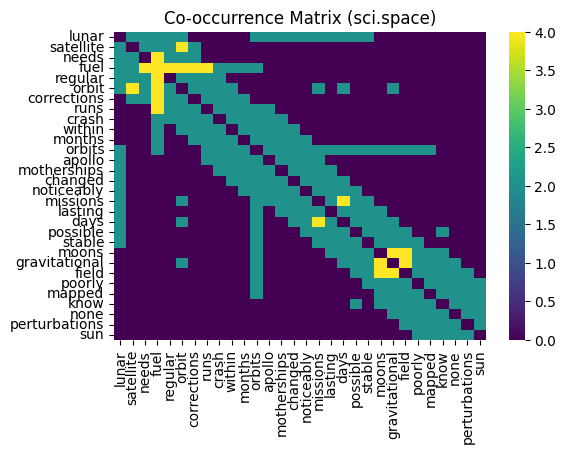

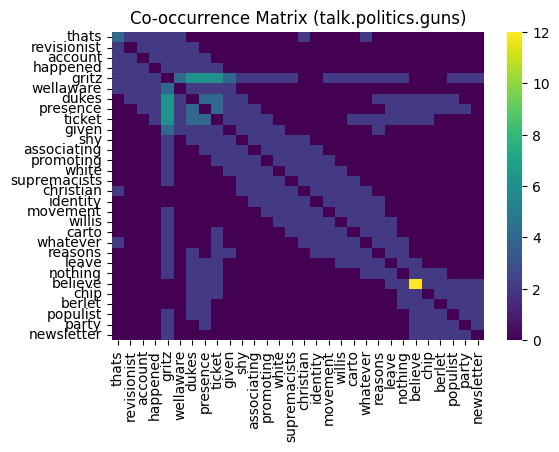

In [66]:
# Visualize the co-occurrence matrix as a heatmap
def plot_heatmap(matrix, vocab, title):
    words = list(vocab.keys())
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix[:30, :30], xticklabels=words[:30], yticklabels=words[:30], cmap='viridis')
    plt.title(title)
    plt.show()

plot_heatmap(cooccurrence_matrix_sci_space, vocab_sci_space, 'Co-occurrence Matrix (sci.space)')
plot_heatmap(cooccurrence_matrix_politics, vocab_politics, 'Co-occurrence Matrix (talk.politics.guns)')

In [67]:
# Compare co-occurrence patterns
def compare_cooccurrence_patterns(matrix1, vocab1, matrix2, vocab2):
    common_words = set(vocab1.keys()).intersection(set(vocab2.keys()))
    if not common_words:
        print("No common words to compare.")
        return
    
    for word in common_words:
        idx1, idx2 = vocab1[word], vocab2[word]
        cooccurrences1 = matrix1[idx1]
        cooccurrences2 = matrix2[idx2]
        top_words1 = [word for word, _ in sorted(zip(vocab1.keys(), cooccurrences1), key=lambda x: x[1], reverse=True)][:10]
        top_words2 = [word for word, _ in sorted(zip(vocab2.keys(), cooccurrences2), key=lambda x: x[1], reverse=True)][:10]
        print(f"Word: {word}")
        print(f"Top co-occurring words in sci.space: {top_words1}")
        print(f"Top co-occurring words in talk.politics.guns: {top_words2}")
        print("-" * 50)

compare_cooccurrence_patterns(cooccurrence_matrix_sci_space, vocab_sci_space, cooccurrence_matrix_politics, vocab_politics)

# Discuss interesting word relationships or differences
# This step will depend on the output of the comparison

Word: different
Top co-occurring words in sci.space: ['telemetry', 'test', 'assembly', 'processing', 'tpa', 'seven', 'rates', 'run', 'ran', 'lunar']
Top co-occurring words in talk.politics.guns: ['thats', 'nothing', 'dont', 'make', 'know', 'come', 'want', 'outcome', 'inquiry', 'else']
--------------------------------------------------
Word: april
Top co-occurring words in sci.space: ['1993', '15', 'spacecraft', '9', '12', '1', 'sequence', 'memory', 'test', 'mission']
Top co-occurring words in talk.politics.guns: ['press', 'house', 'president', 'remarks', 'office', 'secretary', '2024562100', 'washington', '20', 'following']
--------------------------------------------------
Word: sent
Top co-occurring words in sci.space: ['commands', 'april', 'sent', 'command', 'real', 'periodically', 'periods', 'fuel', 'try', '9']
Top co-occurring words in talk.politics.guns: ['never', 'would', 'one', 'armed', 'collective', 'good', 'interested', 'forces', 'anywhere', 'poor']
---------------------------

## 4. Word Embeddings

### 4.1 Word2Vec Exercise
- Train a Word2Vec model on the data.
- Find and visualize the embeddings for the top 10 most frequent words from each category.
- Explore word analogies and nearest neighbors for selected words.


In [4]:
import gensim
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec

In [7]:
# Load 20 newsgroups data
comp=fetch_20newsgroups(subset='train', categories=['comp.graphics'], remove=('headers', 'footers', 'quotes'))
sci=fetch_20newsgroups(subset='train', categories=['sci.space'], remove=('headers', 'footers', 'quotes'))
poli=fetch_20newsgroups(subset='train', categories=['talk.politics.guns'], remove=('headers', 'footers', 'quotes'))

# Take first 30 rows of data for each category
data_sci_space = sci.data[:30]
data_comp_graphics = comp.data[:30]
data_politics = poli.data[:30]

# Preprocess data
def preprocess_text(text):
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    return filtered_tokens


In [8]:
# Train Word2Vec model for each category
models = {}
categories = ['sci.space', 'comp.graphics', 'talk.politics.guns']
for category, data_category in zip(categories, [data_sci_space, data_comp_graphics, data_politics]):
    # Preprocess and tokenize the data for the category
    tokenized_data_category = [preprocess_text(text) for text in data_category]
    # Train Word2Vec model
    model = Word2Vec(sentences=tokenized_data_category, vector_size=100, window=5, min_count=1, workers=4)
    models[category] = model

# Save or load the trained model if needed
# model.save("word2vec_model.model")
# model = Word2Vec.load("word2vec_model.model")

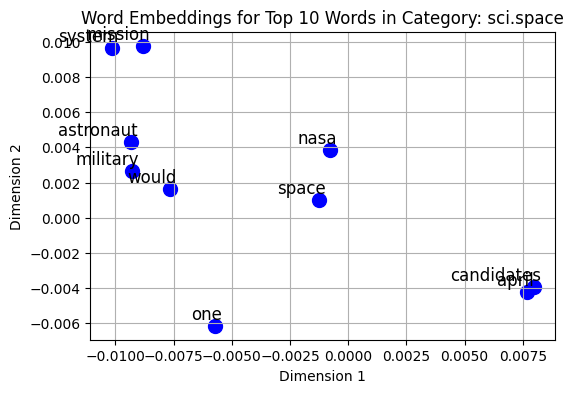

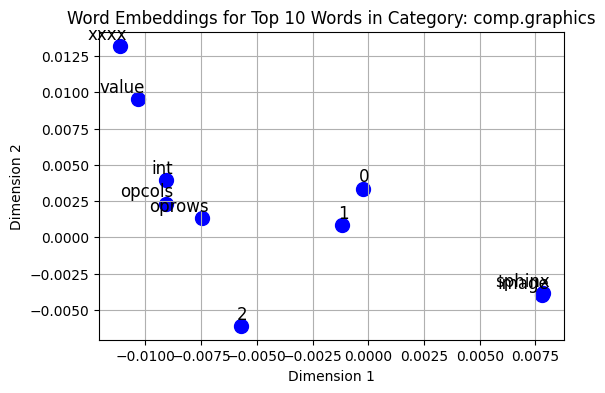

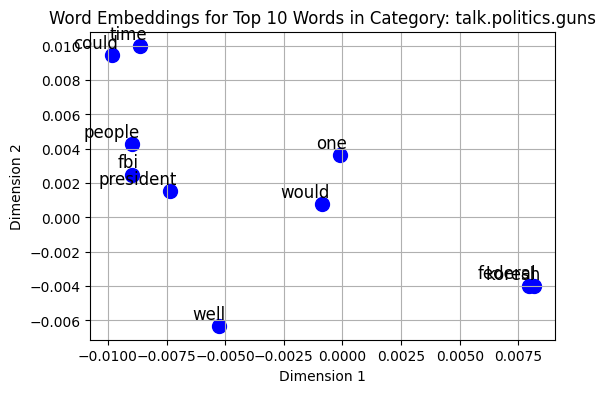

In [9]:
# Visualize embeddings for the top words
for category, model in models.items():
    # Get vocabulary
    vocab = model.wv.index_to_key
    # Get word frequencies
    word_freq = {word: model.wv.get_vecattr(word, "count") for word in vocab}
    # Sort words by frequency
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    # Get top 10 most frequent words
    top_words = [word for word, _ in sorted_words[:10]]
    # Get word vectors
    word_vectors = [model.wv[word] for word in top_words]
    # Plot word embeddings
    x = [vec[0] for vec in word_vectors]
    y = [vec[1] for vec in word_vectors]
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, marker='o', color='blue', s=100)
    for i, word in enumerate(top_words):
        plt.annotate(word, xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontsize=12)
    plt.title(f"Word Embeddings for Top 10 Words in Category: {category}")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()

## 5. Similarity

- Calculate the cosine similarity between the "sci.space" and "comp.graphics" using TF-IDF vectors.
- Identify and discuss which articles are most similar between the two data.

In [82]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

# Load 20 newsgroups data
comp=fetch_20newsgroups(subset='train', categories=['comp.graphics'], remove=('headers', 'footers', 'quotes'))
sci=fetch_20newsgroups(subset='train', categories=['sci.space'], remove=('headers', 'footers', 'quotes'))

# Take first 30 rows of data for each category
data_sci_space = sci.data[:30]
data_comp_graphics = comp.data[40:70]

# Concatenate the data
data = data_sci_space + data_comp_graphics

#preprocessing data
def preprocess_text(text):
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove numbers
    text = re.sub(r'\b\d+\b', '', text)
    # Remove numbers linked with letters
    text = re.sub(r'\b\d+[a-zA-Z]+\b|\b[a-zA-Z]+\d+\b', '', text)
    # Remove numbers linked with letters
    text = re.sub(r'\b(?:640x480x16|320x200x256|0x3d4|1600x1200x256|)\b', '', text)
    # Tokenize and remove stopwords
    return ' '.join([word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stopwords.words('english')])

processed_texts = [preprocess_text(text) for text in data]

In [83]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', max_features=1000)
X = vectorizer.fit_transform(processed_texts)

# Calculate cosine similarity
similarity_matrix = cosine_similarity(X)

# # Print similarity matrix
# print(similarity_matrix)

In [84]:
# Identify most similar articles
max_similarities = similarity_matrix.max(axis=1)
most_similar_indices = similarity_matrix.argmax(axis=1)

In [85]:
import numpy as np

# Calculate the indices of the most similar and dissimilar pairs
most_similar_idx = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
most_dissimilar_idx = np.unravel_index(np.argmin(similarity_matrix, axis=None), similarity_matrix.shape)

# Print the most similar pair
print("Most similar pair:")
print("-" * 100)
print("Text from 'sci.space':", data[most_similar_idx[0]])
print("-" * 100)
print("Text from 'comp.graphics':", data[most_similar_idx[1]])
print("-" * 100)
print("Similarity score:", similarity_matrix[most_similar_idx])
print("-" * 100)

# Print the most dissimilar pair
print("\nMost dissimilar pair:")
print("-" * 100)
print("Text from 'sci.space':", data[most_dissimilar_idx[0]])
print("-" * 100)
print("Text from 'comp.graphics':", data[most_dissimilar_idx[1]])
print("-" * 100)
print("Similarity score:", similarity_matrix[most_dissimilar_idx])


Most similar pair:
----------------------------------------------------------------------------------------------------
Text from 'sci.space': 



That would not explain why widely separated detectors, such as on Ulysses
and PVO and Ginga et al., would see a burst at the same time(*).  In fact, be-
fore BATSE, having this widely separated "Interplanetary Network" was the
only sure way to locate a random burst.  With only one detector, one cannot
locate a burst (except to say "It's somewhere in the field of view.").  With
two detectors, one can use the time that the burst is seen in each detector
to narrow the location to a thin annulus on the sky.  With three detectors,
one gets intersecting annuli, giving two possible locations.  If one of these
locations is impossible (because, say, the Earth blocked that part of the 
sky), voila, you have an error box.

BATSE, by having 8 detectors of its own, can do its own location determination,
but only to within about 3 degrees (would someone a

## 6. Pointwise Mutual Information (PMI)

- Calculate the PMI for word pairs in 'comp.graphics'.
- Identify the top 10 word pairs with the highest PMI in each category and analyze their significance in the context of the story.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
import itertools
import networkx as nx
from nltk import BigramCollocationFinder, BigramAssocMeasures

# Load 20 newsgroups data
category = 'comp.graphics'
newsgroups = fetch_20newsgroups(subset='train', categories=[category], remove=('headers', 'footers', 'quotes'))

# Preprocess data
def preprocess_text(text):
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove numbers
    text = re.sub(r'\b\d+\b', '', text)
    # Remove numbers linked with letters
    text = re.sub(r'\b\d+[a-zA-Z]+\b|\b[a-zA-Z]+\d+\b', '', text)
    # Remove numbers linked with letters
    text = re.sub(r'\b(?:640x480x16|320x200x256|0x3d4|1600x1200x256|)\b', '', text)
    # Tokenize and remove stopwords
    return ' '.join([word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stopwords.words('english')])

processed_texts = [preprocess_text(text) for text in newsgroups.data[:30]]

In [90]:
# Tokenize the preprocessed texts into words
tokenized_texts = [word_tokenize(text) for text in processed_texts]

# Flatten the list of tokenized texts into a single list of words
all_words = [word for text in tokenized_texts for word in text]

# Create a BigramCollocationFinder from the tokenized texts
finder = BigramCollocationFinder.from_words(all_words)

# Calculate PMI for each bigram
pmi_scores = finder.score_ngrams(BigramAssocMeasures.pmi)


In [91]:
# Print the top 10 word pairs with the highest PMI
print("Top 10 word pairs with the highest PMI:")
for i, (bigram, pmi) in enumerate(pmi_scores[:10], 1):
    print(f"{i}. {bigram}: {pmi:.2f}")

Top 10 word pairs with the highest PMI:
1. ('0x3d4', 'registers'): 11.03
2. ('320x240', 'run'): 11.03
3. ('accept', 'corrected'): 11.03
4. ('accessible', 'menuing'): 11.03
5. ('acm', 'student'): 11.03
6. ('across', 'spectrum'): 11.03
7. ('adabas', 'sybase'): 11.03
8. ('affraid', 'author'): 11.03
9. ('algebraic', 'equations'): 11.03
10. ('american', 'indutrial'): 11.03


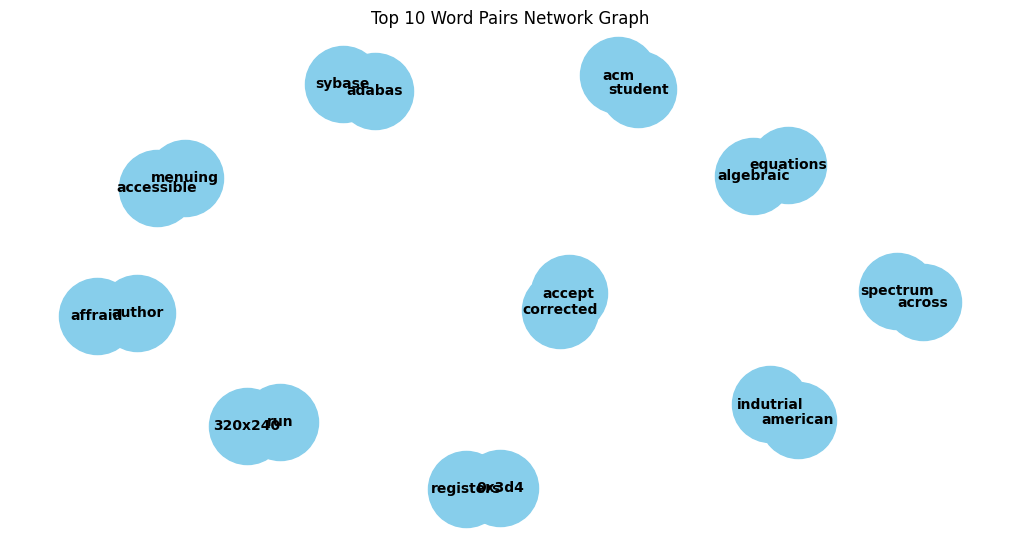

In [92]:
# Get the top 10 word pairs with the highest PMI
top_word_pairs = [bigram for bigram, _ in pmi_scores[:10]]

# Create a graph
G = nx.Graph()

# Add nodes for each word in the top word pairs
for word_pair in top_word_pairs:
    G.add_node(word_pair[0])
    G.add_node(word_pair[1])

# Add edges between the top word pairs
for word_pair in top_word_pairs:
    G.add_edge(word_pair[0], word_pair[1])

# Plot the graph
plt.figure(figsize=(10, 5))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold')
plt.title('Top 10 Word Pairs Network Graph')
plt.show()

## 7. Topic Modelling

### 7.1 Latent Semantic Analysis (LSA) Exercise
- Apply LSA on the topic of "politics".
- Identify and interpret the top 5 topics.

In [93]:
from sklearn.decomposition import TruncatedSVD

# Load 20 newsgroups data
category = 'talk.politics.guns'
newsgroups = fetch_20newsgroups(subset='train', categories=[category], remove=('headers', 'footers', 'quotes'))

# Preprocess data
def preprocess_text(text):
    return text.lower()

processed_texts = [preprocess_text(text) for text in newsgroups.data]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', max_features=1000)
X = vectorizer.fit_transform(processed_texts)

# LSA
lsa = TruncatedSVD(n_components=5, random_state=42)
lsa_topics = lsa.fit_transform(X)

# Identify and interpret the top 5 topics
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lsa.components_):
    top_terms = [terms[ind] for ind in topic.argsort()[:-6:-1]]
    print(f"Topic {i+1}: {', '.join(top_terms)}")


Topic 1: gun, people, don, guns, think
Topic 2: fbi, koresh, batf, compound, com
Topic 3: militia, right, people, amendment, government
Topic 4: feustel, com, militia, right, dave
Topic 5: law, crime, 000, batf, control


### 7.2 Latent Dirichlet Allocation (LDA) Exercise
- Perform LDA on the data, treating each category as a document.
- Determine the optimal number of topics using coherence scores.
- Display the top words for each topic.
- Discuss how well the topics represent the content of the data.

Note. This may take some time

In [95]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Load 20 newsgroups data
comp = fetch_20newsgroups(subset='train', categories=['comp.graphics'], remove=('headers', 'footers', 'quotes'))
sci = fetch_20newsgroups(subset='train', categories=['sci.space'], remove=('headers', 'footers', 'quotes'))
politics = fetch_20newsgroups(subset='train', categories=['talk.politics.guns'], remove=('headers', 'footers', 'quotes'))

# Take first 30 rows of data for each category
data_sci_space = sci.data[:30]
data_comp_graphics = comp.data[:30]
data_politics = politics.data[:30]

# Preprocess data
def preprocess_text(text):
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    return filtered_tokens

# Tokenize and preprocess the data for each category
tokenized_data_per_category = []
for category_data in [data_comp_graphics, data_sci_space, data_politics]:
    tokenized_category_data = [preprocess_text(text) for text in category_data]
    tokenized_data_per_category.append(tokenized_category_data)

# Flatten the list of tokenized data within each category
flat_tokenized_data_per_category = [[token for sublist in category_data for token in sublist] for category_data in tokenized_data_per_category]

# Combine documents within each category into a single document
combined_documents_per_category = [" ".join(doc) for doc in flat_tokenized_data_per_category]


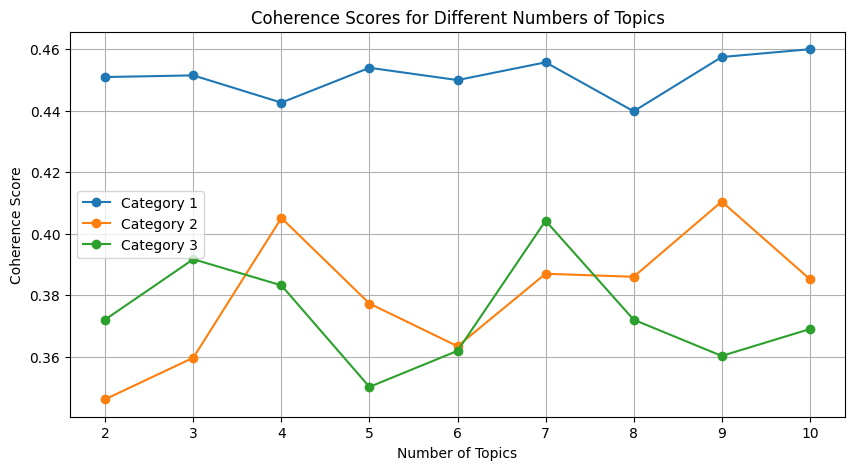

In [96]:
# Create Dictionary and Corpus
dictionaries = []
corpora = []
for combined_documents in combined_documents_per_category:
    tokenized_category_data = combined_documents.split()
    dictionary = Dictionary([tokenized_category_data])
    corpus = [dictionary.doc2bow(tokenized_category_data)]
    dictionaries.append(dictionary)
    corpora.append(corpus)

# Define a function to compute coherence scores for different numbers of topics
def compute_coherence_scores(corpus, dictionary, texts, num_topics_range):
    coherence_scores = []
    for num_topics in num_topics_range:
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)
    return coherence_scores

# Define a range of numbers of topics to evaluate
num_topics_range = range(2, 11)

# Compute coherence scores for each category
coherence_scores_per_category = []
for corpus, dictionary, texts in zip(corpora, dictionaries, tokenized_data_per_category):
    coherence_scores = compute_coherence_scores(corpus, dictionary, texts, num_topics_range)
    coherence_scores_per_category.append(coherence_scores)

# Plot coherence scores for each category
plt.figure(figsize=(10, 5))
for i, coherence_scores in enumerate(coherence_scores_per_category):
    plt.plot(num_topics_range, coherence_scores, marker='o', label=f'Category {i+1}')
plt.title('Coherence Scores for Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# %pip install pyLDAvis

In [98]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# Function to display top words for each topic
def display_top_words(lda_model, dictionary, num_words=10):
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic {idx}:")
        print([word.split('*')[1].strip().strip('"') for word in topic.split(' + ')[:num_words]])
        print()

# Compute and display the topics for each category
optimal_num_topics = 4
for i, (corpus, dictionary) in enumerate(zip(corpora, dictionaries)):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics, random_state=42)
    print(f"Category {i+1} - Top words per topic:")
    display_top_words(lda_model, dictionary)
    print("-" * 40)

# Example visualization using the last model as a sample
# Plot topics using pyLDAvis (if pyLDAvis is installed)
lda_vis_data = gensimvis.prepare(lda_model, corpora[2], dictionaries[2])
pyLDAvis.display(lda_vis_data)

Category 1 - Top words per topic:
Topic 0:
['1', 'int', '0', 'xxxx', 'opcols', 'image', 'value', 'graphics', 'know', 'row']

Topic 1:
['1', 'xxxx', 'int', 'oprows', 'image', '0', 'opcols', 'graphics', '2', 'value']

Topic 2:
['1', '0', 'int', 'sphinx', 'oprows', 'xxxx', 'opcols', '2', 'image', 'ellipse']

Topic 3:
['1', 'xxxx', 'int', 'sphinx', '0', 'oprows', 'row', 'opcols', 'x', 'value']

----------------------------------------
Category 2 - Top words per topic:
Topic 0:
['astronaut', 'nasa', 'space', 'mission', 'would', 'military', 'candidates', 'spacecraft', 'flight', 'system']

Topic 1:
['space', 'astronaut', 'nasa', 'mission', 'would', 'april', 'one', 'shuttle', 'military', 'system']

Topic 2:
['space', 'astronaut', 'nasa', 'mission', 'would', 'military', 'cost', 'system', 'shuttle', 'one']

Topic 3:
['space', 'astronaut', 'nasa', 'would', 'one', 'mission', 'april', 'system', 'candidates', 'pilot']

----------------------------------------
Category 3 - Top words per topic:
Topic 